<a href="https://colab.research.google.com/github/kubercodes/kubercodes-Data-Analysis-and-Visualizations-and-Predicting-Future-Energy-Consumption-using-LSTM/blob/main/Data_Analysis_and_Visualizations_and_Predicting_Future_Energy_Consumption_using_LSTM_Predicting_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
 

In [7]:
df = pd.read_csv("/content/AEP_hourly.csv")

In [8]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [9]:
# Information about Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None


In [10]:
# Describing the dataset
print(df.describe())

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [11]:
df.loc[~df.index.duplicated(), :]

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [12]:
# NULL Values
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [13]:
df1 = df
df1["Month"] = pd.to_datetime(df["Datetime"]).dt.month
df1["Year"] = pd.to_datetime(df["Datetime"]).dt.year
df1["Date"] = pd.to_datetime(df["Datetime"]).dt.date
df1["Time"] = pd.to_datetime(df["Datetime"]).dt.time
df1["Week"] = pd.to_datetime(df["Datetime"]).dt.week
df1["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
df1 = df.set_index("Datetime")
df1.index = pd.to_datetime(df1.index)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [14]:
# unique Years
print(df.Year.unique(),"\n")
print("Unique Years : ",df.Year.nunique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Unique Years :  15


## Energy Consumption Each Year

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

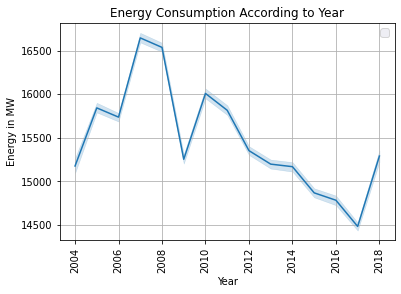

In [15]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x="Year", y="AEP_MW", data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Year")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single str

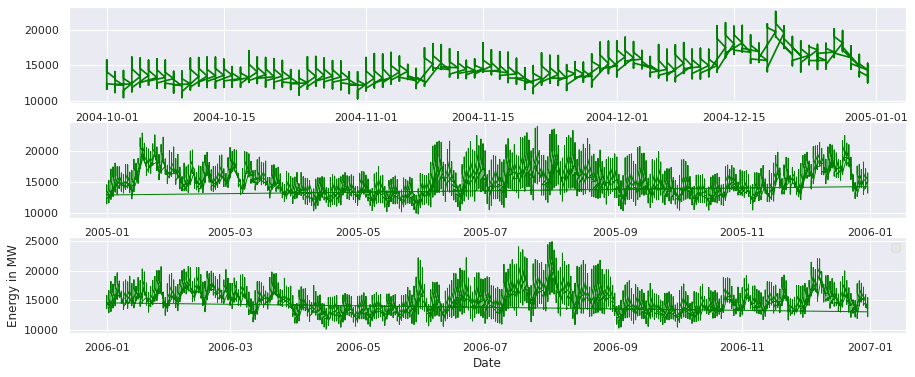

In [16]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

#plt.title("Energy consumptionnin")
style.use('ggplot')

y_2004 = df1["2004"]["AEP_MW"].to_list()
x_2004 = df1["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = df1["2005"]["AEP_MW"].to_list()
x_2005 = df1["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = df1["2006"]["AEP_MW"].to_list()
x_2006 = df1["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)

plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()
#plt.title("Energy consumption")

## Energy Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

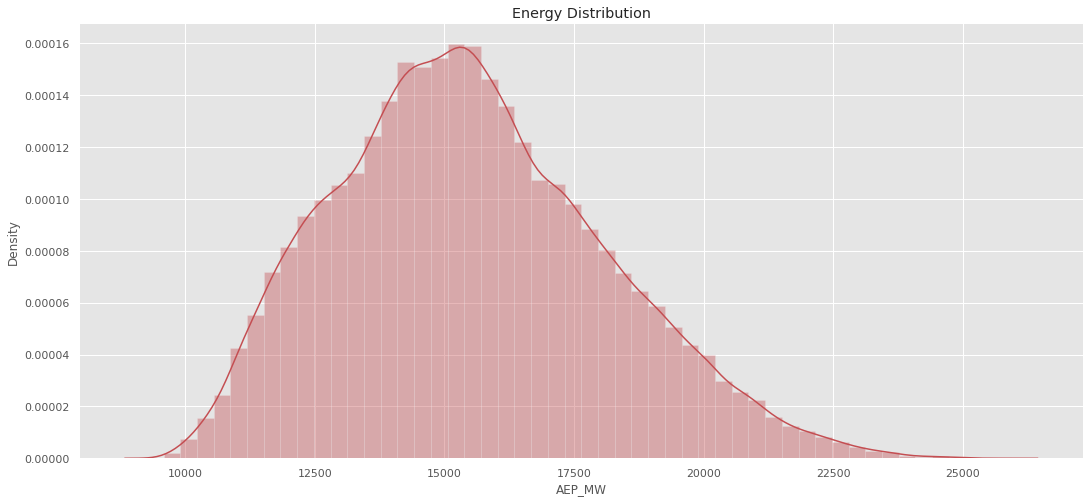

In [17]:
sns.distplot(df1["AEP_MW"],color = 'r')
plt.title("Energy Distribution")

##Energy with respect to Time


No handles with labels found to put in legend.


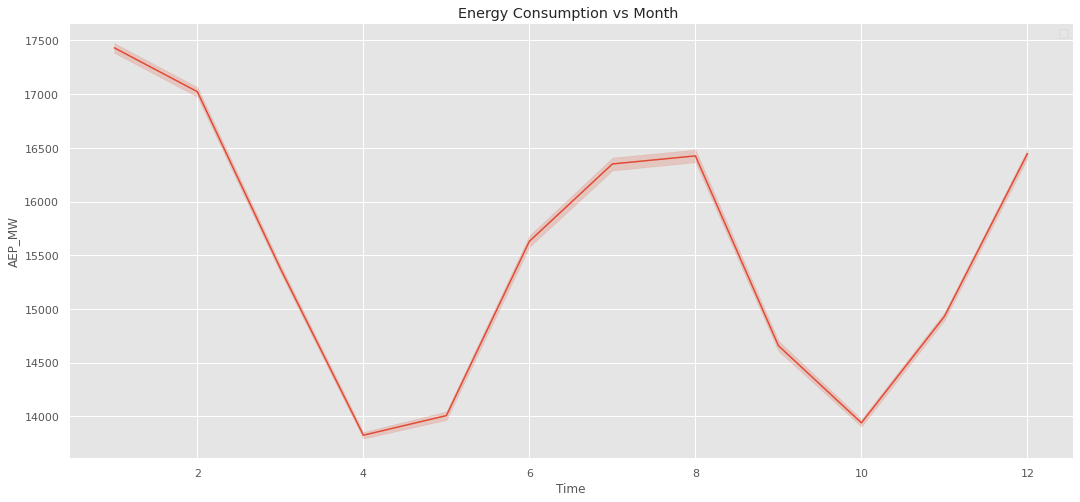

In [18]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=df["Month"],y=df["AEP_MW"], data=df)
plt.title("Energy Consumption vs Month ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()


## Resampling Data

In [19]:
NewDataset = df1.resample('D').mean()

In [20]:
print("old dataset",df1.shape)
print("new dataset",NewDataset.shape)

old dataset (121273, 7)
new dataset (5055, 4)


In [21]:
NewDataset

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10.0,2004.0,40.0
2004-10-02,12999.875000,10.0,2004.0,40.0
2004-10-03,12227.083333,10.0,2004.0,40.0
2004-10-04,14309.041667,10.0,2004.0,41.0
2004-10-05,14439.708333,10.0,2004.0,41.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [22]:
TestData = NewDataset.tail(100)
TestData

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


In [23]:
Training_Set = NewDataset.iloc[:,0:1]
Training_Set = Training_Set[:-60]
Training_Set

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-05-31,16741.083333
2018-06-01,15734.666667
2018-06-02,14212.166667


In [24]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [25]:
from sklearn.preprocessing import MinMaxScaler
#Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range = (0,1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       ...,
       [0.26628457],
       [0.23335788],
       [0.25909104]])

In [26]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [27]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

##Model

In [28]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
  regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 170s 1s/step - loss: 0.0234
Epoch 2/20
155/155 [==============================] - 160s 1s/step - loss: 0.0179
Epoch 3/20
155/155 [==============================] - 155s 1s/step - loss: 0.0173
Epoch 4/20
155/155 [==============================] - 158s 1s/step - loss: 0.0169
Epoch 5/20
155/155 [==============================] - 157s 1s/step - loss: 0.0155
Epoch 6/20
155/155 [==============================] - 157s 1s/step - loss: 0.0154
Epoch 7/20
155/155 [==============================] - 161s 1s/step - loss: 0.0144
Epoch 8/20
155/155 [==============================] - 155s 1s/step - loss: 0.0121
Epoch 9/20
155/155 [==============================] - 159s 1s/step - loss: 0.0104
Epoch 10/20
155/155 [==============================] - 161s 1s/step - loss: 0.0094
Epoch 11/20
155/155 [==============================] - 156s 1s/step - loss: 0.0089
Epoch 12/20
155/155 [==============================] - 158s 1s/step - loss: 0.0082
Epoch 13/20
1

## Test Data

In [30]:
TestData.head()

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0


In [31]:
TestData.shape

(100, 4)

In [32]:
NewDataset.shape

(5055, 4)

In [34]:
Df_Total = pd.concat((NewDataset[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [35]:
Df_Total.shape

(5155, 1)

In [36]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [37]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [39]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## Future Predicted

In [41]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,14398.590820
1,2018-04-27,12964.000000,13611.224609
2,2018-04-28,12237.583333,14315.442383
3,2018-04-29,12156.791667,13580.063477
4,2018-04-30,13443.500000,13629.782227
...,...,...,...
95,2018-07-30,15368.083333,15041.367188
96,2018-07-31,15180.291667,16287.516602
97,2018-08-01,15151.166667,15433.137695
98,2018-08-02,15687.666667,15263.727539


In [42]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


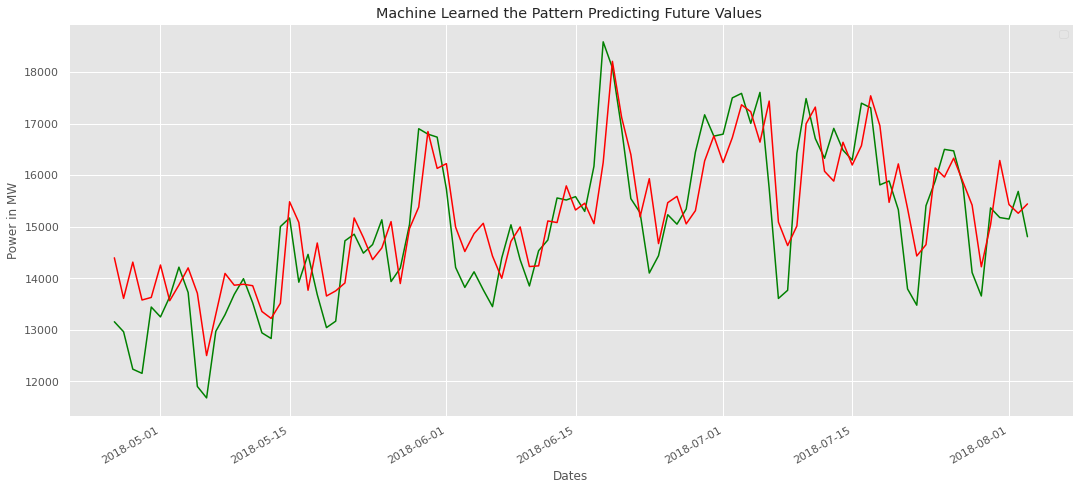

In [43]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()